# Face Recognition with Local Binary Patterns Histograms
by Võ Minh Quân (CH1801012) June 2019

Keywords: Local Binary Patterns, LBP, K-nearest-neighbor, Face recognition

## Local Binary Patterns
* Local Binary Patterns (LBP) is a type of visual descriptor used for classification in computer vision.
* LBPs compute a local representation of texture.
    * This local representation is constructed by comparing each pixel with its surrounding neighborhood of pixels.
* Steps to compute LBP is desmonstrate as below:
    * Consider each pixel, if the intensity of the center pixel is greater-than-or-equal to its neighbor, then we set the value to 1; otherwise, we set it to 0. An example of LBP with a fixed 3x3 window
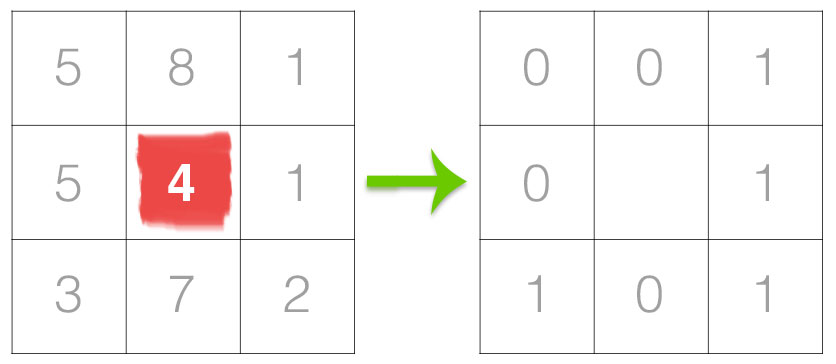
    * Then we compute LBP value as:
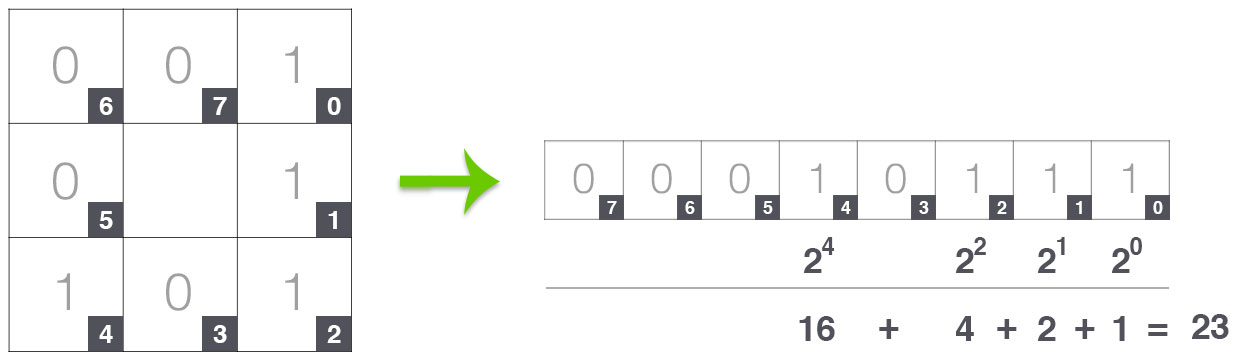
    * Finally, we can compute a histogram that tabulates the number of times each LBP pattern occurs. We can treat this histogram as our feature vector.
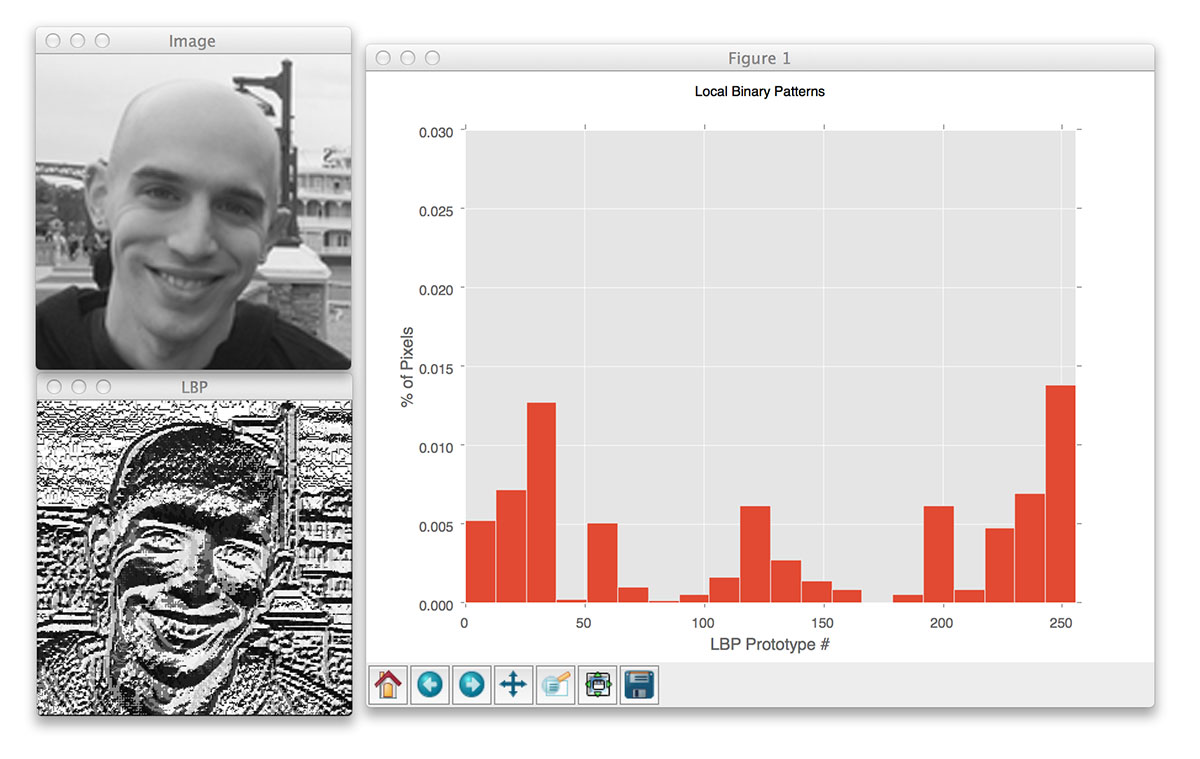

Read mote at https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

## K nearest neighbor
* After using LBPH to descript the images to vectors, we use K nearest neighbor as the predictor for the task of predicting identity of the specific image
* The intuition of K nearest neighbor can be explained by this picture:
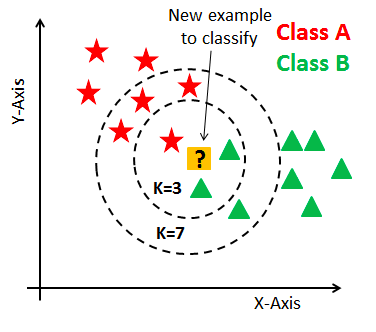

## Implementation
* Below are implementation for the Face recognizer using theory explained above.
* In this work, we concentrate on the core task namely Face recognizition and use Haar like features for Face detection task.
    * Read more about Haar like features at https://en.wikipedia.org/wiki/Haar-like_feature

### Import libraries

In [1]:
import os
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

### Train a Face recognizer using LBPH

In [2]:
# Initialize LBPH recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

In [4]:
# Read data
def getImagesWithID(path):
    """
    Read images and there IDs (names) from path
    :param str path: path to dataset
    :return list IDs[str], list faces[NPmatrix]:
    """
    user_paths = [os.path.join(path, f) for f in os.listdir(path)]
    faces = []
    IDs = []
    for user in user_paths:
        for imagePath in os.listdir(user):
            # Read the image and convert to grayscale
            facesImg = Image.open(os.path.join(user, imagePath)).convert('L')
            faceNP = np.array(facesImg, 'uint8')
            # Get the label of the image
            IDs.append(user.split('/')[1])
            # Detect the face in the image
            faces.append(faceNP)
  
    return IDs, faces

path = "FaceDB"
Ids, faces  = getImagesWithID(path)

In [6]:
# recognizer by OpenCV only accept Int labels
# Two mappings between ID and name are required
id2name = {}
name2id = {}

for idx, name in enumerate(set(Ids)):
    id2name[idx] = name
    name2id[name] = idx

In [7]:
# Train the recognizer using the data read
recognizer.train(faces, np.array([name2id[name] for name in Ids]))

In [8]:
# Save model for later uses (optional)
recognizer.save("LBPHrecognizer.yml")

### Use model to recognize faces

In [9]:
# To recognize faces from an arbitrary image, a Face detector is required
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def get_cropped_faces(gray):
    """
    Get cropped faces from a grayscale image
    :param NPmatrix gray: grayscale image containing people in arbitrary background
    :return list cropped_faces[NPmatrix], list faces_coor[(int x, int y, int w, int h)]:
    """
    faces_coor = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10)
    cropped_faces = []
    for (x, y, w, h) in faces_coor:
        cropped_faces.append(img[y:y+h, x:x+w])
    return cropped_faces, faces_coor

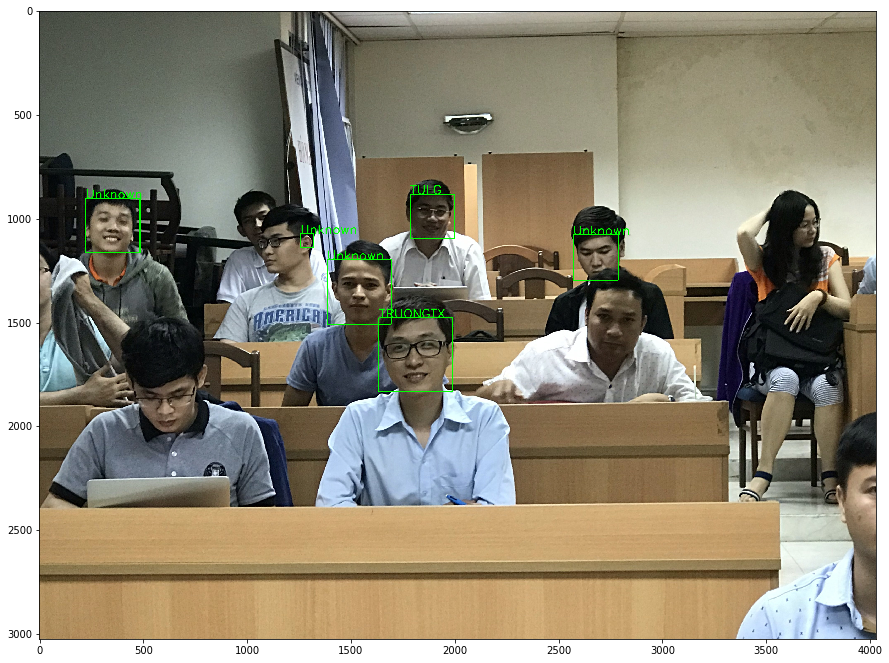

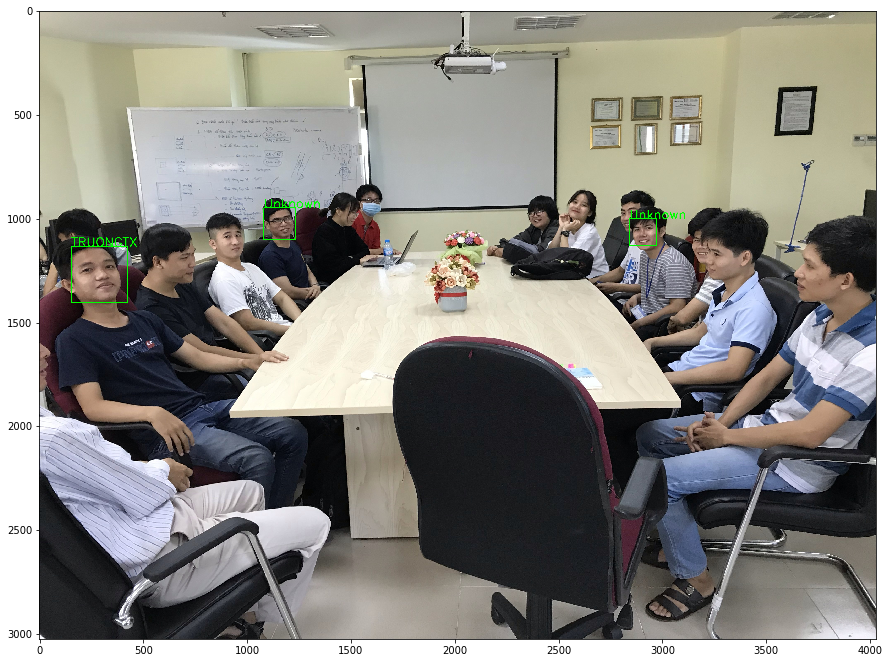

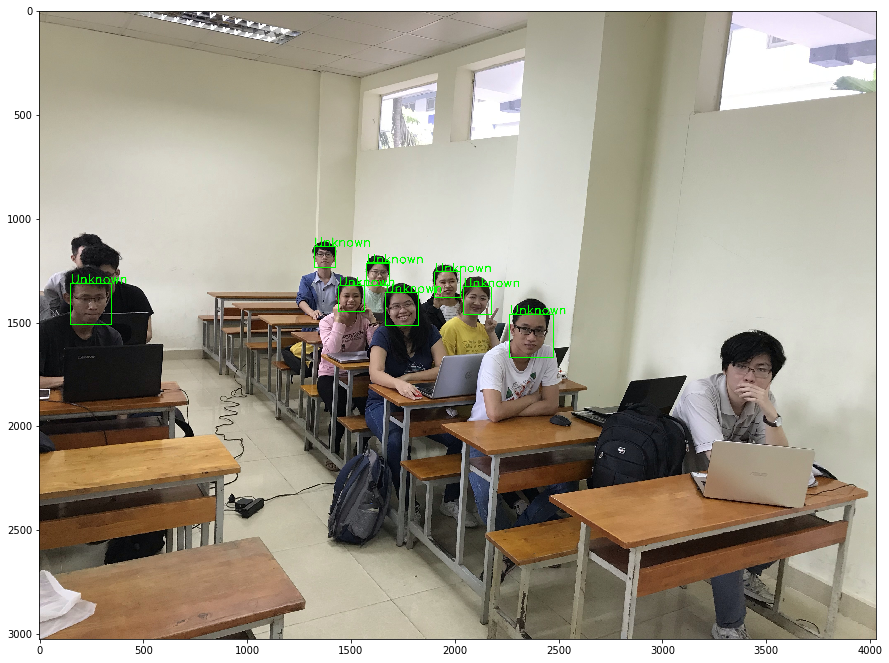

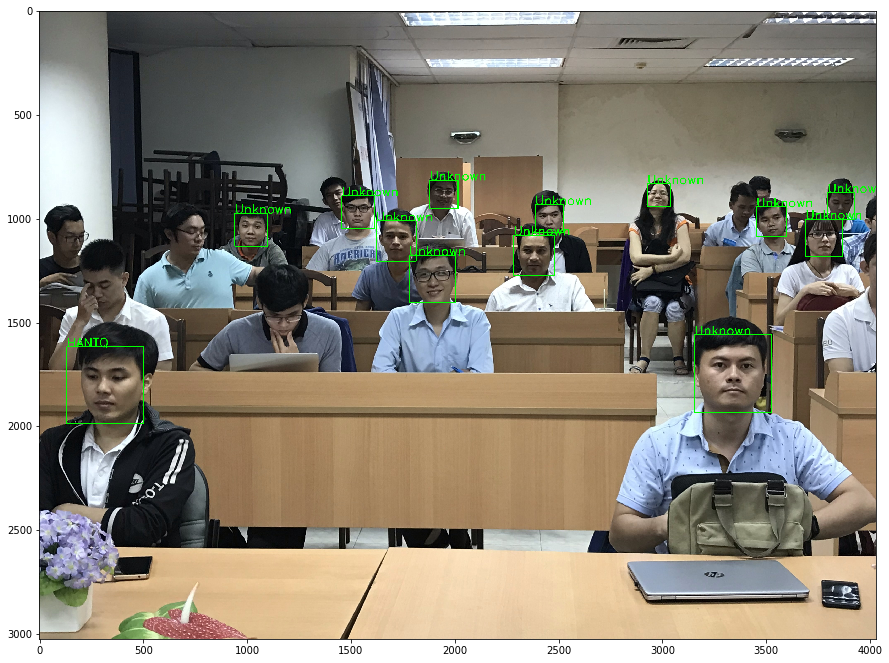

In [32]:
test_set = 'test_set'
FACE_REC_THRES = 37

for img_name in os.listdir(test_set):
    if not any([_ for _ in ['.png', '.jpg', ] if img_name.endswith(_)]):
        continue
  
    # read img
    img_path = os.path.join(test_set, img_name)
    img = cv2.imread(img_path)
  
    # convert to grayscale img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # cv2 read images as BGR, matplotlib display RGB so /
    # we do a BGR2RGB convertion to display correctly
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # get cropped faces
    cropped_faces, faces_coor = get_cropped_faces(gray)
  
    for i, face in enumerate(cropped_faces):
        # Create grayscale img
        gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        # Use recognizer to make prediction
        pred_id, distance = recognizer.predict(gray_face)
        # Mapping id2name and apply threshold check
        pred_name = id2name[pred_id] if distance < FACE_REC_THRES else 'Unknown'
        
        # Highlight face detected 
        x, y, w, h = faces_coor[i]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 3)
        # Write face name predicted
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, pred_name,(x, y), font, 2, (0,255,0), 4, cv2.LINE_AA)
    
    # Show img
    plt.figure(figsize = (15, 15))
    plt.imshow(img)
    plt.show()

# Evaluation result
* For this challenge, as the criterion is not defined, we isolate the problem to the task of Face Recognition, so we choose an intrinsic evaluation
* Intrinsic evaluation means we only evaluate Face Recognition task and do not consider Face Detection issues.
* Accuracy: 0.46% (14/30)

# Conclusion
* The Recognizer is unsuable due to bad data. The whole work is for the sake of demonstration.
* The threshold works fine to mark low score faces as "Unknown" (from people outside the class and classmates not providing their images)
